In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv('C:/Users/etiem/Downloads/Assignment1_StreamFlow_Subscription_Data.csv')

In [63]:
# A brief overview of the Data
print(df)

     User_ID  Age  Gender Location     Subscription_Start_Date  \
0          1   56   Other  Central  2020-06-07 01:53:37.656934   
1          2   69   Other     West  2024-02-21 01:53:37.656980   
2          3   46  Female    North  2022-10-06 01:53:37.656995   
3          4   32  Female     East  2022-01-04 01:53:37.657006   
4          5   60  Female    North  2020-03-13 01:53:37.657017   
..       ...  ...     ...      ...                         ...   
995      996   25   Other     East  2020-10-26 01:53:37.667884   
996      997   66  Female     West  2020-05-06 01:53:37.667895   
997      998   52   Other    South  2019-06-19 01:53:37.667906   
998      999   69    Male     East  2020-11-13 01:53:37.667917   
999     1000   32    Male    North  2022-07-10 01:53:37.667930   

    Subscription_Type  Monthly_Payment Payment_Method  Monthly_Hours_Watched  \
0             Premium            19.99    Credit Card              31.513153   
1            Standard            14.99    Credi

In [64]:
df.describe()

,User_ID,Age,Monthly_Payment,Monthly_Hours_Watched,Average_Session_Length,Content_ID,Rating_Given,Churned
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.385000,14.580000,19.071653,1.893771,1049.201000,3.030000,0.246000
std,288.819436,15.321669,3.404922,19.279140,1.868852,29.268058,1.422365,0.430894
min,1.000000,18.000000,9.990000,0.041574,0.000486,1000.000000,1.000000,0.000000
25%,250.750000,31.750000,9.990000,5.490739,0.548918,1023.000000,2.000000,0.000000
50%,500.500000,45.000000,14.990000,13.361219,1.271808,1048.000000,3.000000,0.000000
75%,750.250000,57.000000,14.990000,26.471636,2.623575,1075.000000,4.000000,0.000000
max,1000.000000,70.000000,19.990000,139.170408,11.417557,1099.000000,5.000000,1.000000


In [67]:
# Showing the relationship between Rating_Given and Churned
df.groupby('Rating_Given')['Churned'].mean().sort_values()

Rating_Given
5    0.118483
4    0.178218
1    0.303665
3    0.309783
2    0.330189
Name: Churned, dtype: float64

This output indicates that customers who gave lower ratings (1 and 2) have a higher probability of churning compared to those who gave higher ratings (4 and 5).

Text(0, 0.5, 'Average Churned Rate')

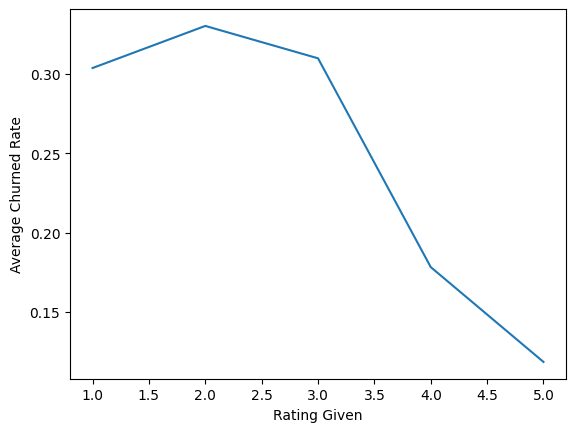

In [68]:
# This is showing the Average Churned Rate across the various Rating_Given
df.groupby('Rating_Given')['Churned'].mean().sort_index().plot()
plt.xlabel('Rating Given')
plt.ylabel('Average Churned Rate')

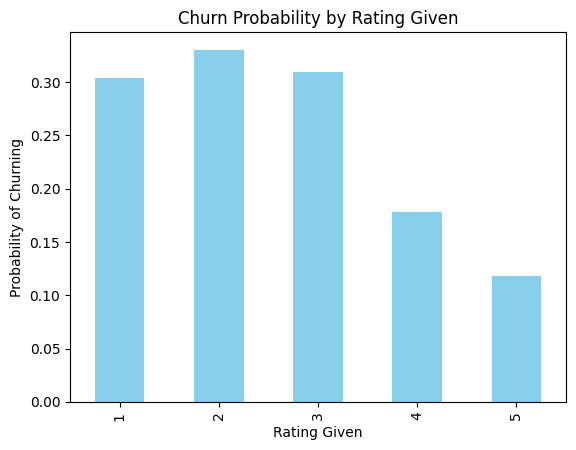

In [69]:
# Calculating the probability of Churning to the Rating Given
churn_probabilities = df.groupby('Rating_Given')['Churned'].mean()

# Plotting Churn probability by Rating Given
churn_probabilities.plot(kind='bar', color='skyblue')
plt.xlabel('Rating Given')
plt.ylabel('Probability of Churning')
plt.title('Churn Probability by Rating Given')
plt.show()

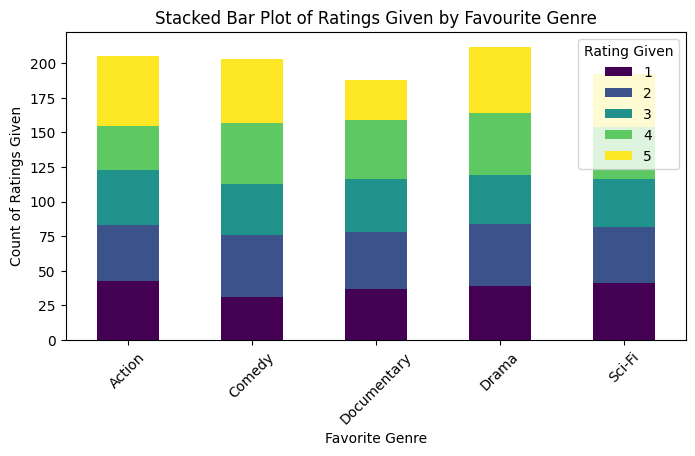

In [70]:
# Comparing 'Favourite_Genre' with 'Rating_Given'
genre_rating_counts = df.groupby(['Favorite_Genre', 'Rating_Given']).size().unstack(fill_value=0)

#plotting Rating_Given by Favourite Genre
genre_rating_counts.plot(kind='bar', stacked=True, figsize=(8, 4), colormap='viridis')
plt.xlabel('Favorite Genre')
plt.ylabel('Count of Ratings Given')
plt.title('Stacked Bar Plot of Ratings Given by Favourite Genre')
plt.legend(title='Rating Given', loc='upper right')
plt.xticks(rotation=45)
plt.show()

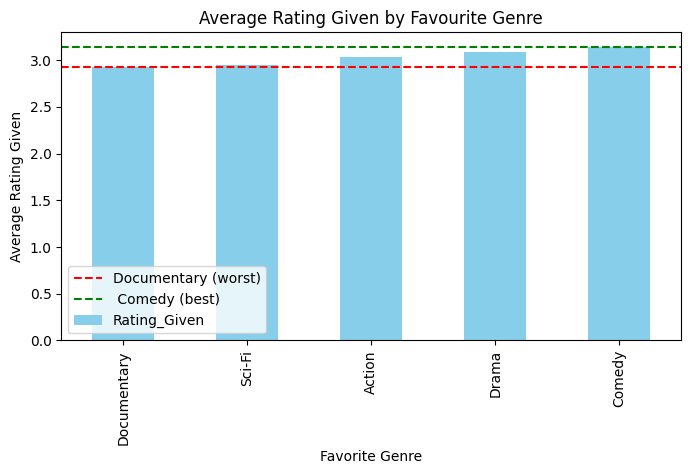

In [71]:

# Calculating the average rating given for each genre to find out the best performing genre
average_ratings = df.groupby('Favorite_Genre')['Rating_Given'].mean().sort_values()

# Plotting the average ratings
plt.figure(figsize=(8, 4))
average_ratings.plot(kind='bar', color='skyblue')
plt.xlabel('Favorite Genre')
plt.ylabel('Average Rating Given')
plt.title('Average Rating Given by Favourite Genre')
plt.axhline(y=average_ratings['Documentary'], color='r', linestyle='--', label='Documentary (worst)')
plt.axhline(y=average_ratings['Comedy'], color='g', linestyle='--', label=' Comedy (best)')
plt.legend()
plt.show()

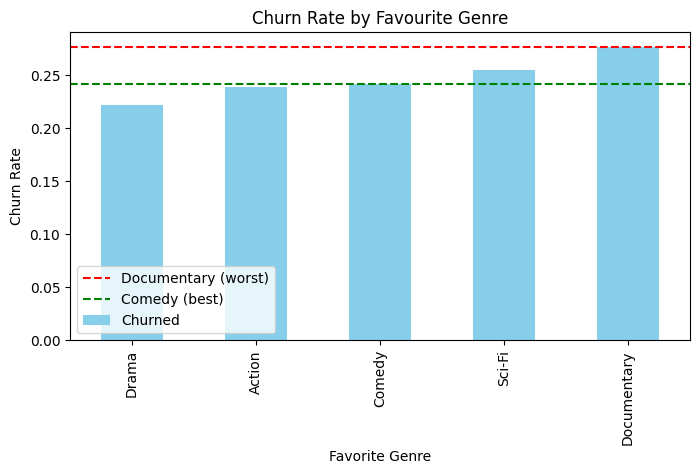

In [72]:
# Calculating the churn rates for each genre to find out the worst performing Genre
churn_rates = df.groupby('Favorite_Genre')['Churned'].mean().sort_values()

# Plotting the churn rates
plt.figure(figsize=(8, 4))
churn_rates.plot(kind='bar', color='skyblue')
plt.xlabel('Favorite Genre')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Favourite Genre')
plt.axhline(y=churn_rates['Documentary'], color='r', linestyle='--', label='Documentary (worst)')
plt.axhline(y=churn_rates['Comedy'], color='g', linestyle='--', label='Comedy (best)')
plt.legend()
plt.show()

In [73]:
# Calculate the number of users in each genre
genre_counts = df['Favorite_Genre'].value_counts()

# Current churn rates
current_churn_Documentary = churn_rates['Documentary']
current_churn_Comedy = churn_rates['Comedy']

# Number of users in documentary genre
num_users_Documentary = genre_counts['Documentary']

# Calculate potential improvement
improved_churn_Documentary = current_churn_action
churn_reduction = current_churn_documentary - improved_churn_documentary

# Calculate the number of retained users with improved churn rate
num_retained_users = num_users_Documentary * churn_reduction

# Assume a value for average revenue per user (ARPU)
average_revenue_per_user = 100  # Example value

# Calculate potential revenue impact
potential_revenue_impact = num_retained_users * average_revenue_per_user

print(f"Number of users in Documentary genre: {num_users_Documentary}")
print(f"Current churn rate for Documentary genre: {current_churn_Documentary:.2%}")
print(f"Current churn rate for Comedy genre: {current_churn_Comedy:.2%}")
print(f"Potential improvement in churn rate: {churn_reduction:.2%}")
print(f"Estimated number of retained users: {num_retained_users}")
print(f"Estimated potential revenue impact: ${potential_revenue_impact}")


Number of users in Documentary genre: 188
Current churn rate for Documentary genre: 27.66%
Current churn rate for Comedy genre: 24.14%
Potential improvement in churn rate: 3.52%
Estimated number of retained users: 6.620689655172414
Estimated potential revenue impact: $662.0689655172414
